<div align=center><h1>Phase Two</h1>

<h5>Dataset and Research Question</h5>
I have chosen Ultimate Fighting Championship data that details fight statistics from every bout since 2010. If you are unfamiliar with the UFC, it is the biggest cage fighting organization in the world. My research question is can we build a model that historically would have won money on UFC fights using Las Vegas gambling odds. Can the house be beat?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

<h5>Data Collection</h5>
In the code cell above, we uploaded a UFC csv file. The upcoming-event csv contains the statistics from the most recent event that has not yet been merged with the rest of the data. 

In [4]:
# Upload Old UFC Data
old_data = pd.read_csv("ufc-master.csv", low_memory=False)

# Upload UFC Data From Recent Fights
merge_data = pd.read_csv("upcoming-event.csv", low_memory=False)

# Merge Dataframes and Display with Head
frames = [merge_data, old_data]
ufc_data = pd.concat(frames)
ufc_data.head()

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,R_td_attempted_bout,B_td_attempted_bout,R_td_pct_bout,B_td_pct_bout,R_sub_attempts_bout,B_sub_attempts_bout,R_pass_bout,B_pass_bout,R_rev_bout,B_rev_bout
0,Kamaru Usman,Gilbert Burns,-278.0,228.0,35.97122302,228.000000,2/13/21,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maycee Barber,Alexa Grasso,-107.0,-107.0,93.45794393,93.457944,2/13/21,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kelvin Gastelum,Ian Heinisch,-205.0,174.0,48.7804878,174.000000,2/13/21,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ricky Simon,Brian Kelleher,-253.0,210.0,39.5256917,210.000000,2/13/21,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Maki Pitolo,Julian Marquez,145.0,-177.0,145,56.497175,2/13/21,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h5>Data Cleaning: Removing Columns</h5>
The original dataset has 137 columns and I am removing those that I suspect won't be useful in predicting fight outcomes like fight location or date. I removed some columns that might be useful but only for a small number of fighters. For example, only the top 15 fighters are given a pound for pound ranking and the vast majority of fighters are not ranked in this category. I did not want to consider the fighter's rankings because they are subjective, only some fighters are ranked, and the rankings can be distorted if there a lot of inactive fighters in that weight class. 

In [5]:
old_col_count = ufc_data.shape
drop_col = ['date', 'location', 'country', 'B_match_weightclass_rank', 'R_match_weightclass_rank', 
            "R_Women's Flyweight_rank", "B_Women's Flyweight_rank", "B_Women's Featherweight_rank", 
            "R_Women's Featherweight_rank", "R_Women's Strawweight_rank", "B_Women's Strawweight_rank",
            "B_Women's Bantamweight_rank", "R_Women's Bantamweight_rank", 'B_Heavyweight_rank', 
            'R_Heavyweight_rank', 'B_Light Heavyweight_rank', 'R_Light Heavyweight_rank',
            'B_Middleweight_rank', 'R_Middleweight_rank', 'B_Welterweight_rank', 'R_Welterweight_rank', 
            'B_Lightweight_rank', 'R_Lightweight_rank', 'B_Featherweight_rank', 'R_Featherweight_rank', 
            'B_Bantamweight_rank', 'R_Bantamweight_rank', 'B_Flyweight_rank', 'R_Flyweight_rank',
            'B_Pound-for-Pound_rank', 'R_Pound-for-Pound_rank']
ufc_data = ufc_data.drop(drop_col, axis=1)
new_col_count = ufc_data.shape
print('Old Column Count: {}'.format(old_col_count[1]))
print('New Column Count: {}'.format(new_col_count[1]))

Old Column Count: 137
New Column Count: 106


<h5>Data Cleaning: Removing Rows</h5>
The dataset contains many rows that are not completed. I will be removing those rows because I think the rest of the columns have the ability to help predict fight outcomes. 

In [6]:
# Drop all rows that are not completed. 
ufc_data = ufc_data.dropna(axis=0, how='any')
ufc_data = ufc_data.reset_index()
ufc_data = ufc_data.drop('index', axis=1)

In [7]:
# No empty cells are left in dataframe
empty = np.where(pd.isnull(ufc_data))
print(empty[0])

[]


In [9]:
# Importing cleaned dataset
ufc_data.to_csv("cleaned_ufc.csv")

In [70]:
# How Big is the Dataset After Cleaning
print('Bytes: {}'.format(ufc_data.memory_usage(index=True).sum()))

Bytes: 850672


### Data Description
1. What are the observations (rows) and the attributes (columns)?   
Each observation is a fight, and each row contains both the fighters’ information. The attributes capture the statistics that were available at the time of the event for each fighter. Most of the information is the rate of a certain action per fifteen minutes. For example, column B_avg_SIG_STR_landed displays a fighter’s significant strikes landed per fifteen minutes. 
1. Why was this dataset created?     
The dataset was created on Kaggle and it hosts competitions for predicting the outcomes for upcoming UFC fights. There are several authors and the most prominent custodian, whose GitHub name is Shortlikeafox, web scraped the gambling data in the hopes of creating a profitable UFC gambling algorithm using machine learning. 
1. Who funded the creation of the dataset?    
The raw data comes from UFCStats.com or sportsbets.com. Sportsbets.com is a online sportsbooks that makes money through setting gambling lines where they are likely to make money. The UFC hosts and televises fights and keeping record is an important part of nerdy fan interaction with the sport. The data scientists that cobbled the dataset together did not state that they were compensated. However, I'd imagine that Shortlikeafox is hoping to create a profitable betting algorithm. 
1. What processes might have influenced what data was observed and recorded and what was not?    
The UFC is where only well-established fighters perform. All the fighters listed in the dataset have an extensive amateur career that is not included.  The data from any fight outside of the UFC is not considered because there is no central Mixed Martial arts database and other organizations have different rules that would affect a fighter’s data. 
1. What preprocessing was done, and how did the data come to be in the form that you are using?    
The dataset comes from three different datasets that were combined. Rajeev Warrier’s dataset was the original dataset, and it contains data for every bout from 1993-2019. Before 2010, the data was improperly recorded and is not included in the final version. Mart Jurisoo compiled the ranking for every fighter. Shortlikeafox scraped the gambling dataset and concatenated the three together to create the final version. 
1. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?    
It is not clear whether the fighters were aware of the data collection. I am assuming they are indifferent because they voluntarily put themselves in a position where the whole world can watch them get beat up. 
1. Where can your raw source data be found, if applicable? Provide a link to the raw data?   
UFC stats: http://www.ufcstats.com/statistics/events/completed    
Gambling Data: https://www.sportsbet.com/bet-types/exotic-bet.html 


### Data Limitations
Other users have complained that the dataset mixes up which fighter is the red or blue fighter. This a problem because it would incorrectly swap the fighters' data. The sample size for most fighters is small. Most fighters only fight two times a year and because of the sport’s violent nature, they often have short careers. This leaves most fighters with only a couple fights that we can use to statistically evaluate them. 

### Exploratory Data Analysis

In [71]:
# Means for Important Statistics
print('Mean Return on a $100 bet for a Red Fighter Win: {:.2f}'.format(ufc_data['R_ev'].mean()))
print('Mean Return on a $100 bet for a Blue Fighter Win: {:.2f}'.format(ufc_data['B_ev'].median()))

Mean Return on a $100 bet for a Red Fighter Win: 95.47
Mean Return on a $100 bet for a Blue Fighter Win: 130.00


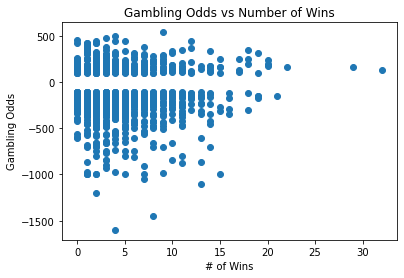

In [72]:
# Scatter Plot Between Total Career Wins and Betting Odds
plt.scatter(ufc_data['R_wins'], ufc_data['R_odds'])
plt.xlabel('# of Wins')
plt.ylabel('Gambling Odds')
plt.title('Gambling Odds vs Number of Wins')
plt.show()

In [73]:
# Covariance and Correlation between Longest Win Streak and Significant Strikes Landed Per Fifteen
print('Covariance between Win Streak and Significant Strikes {:.2f}'.format(ufc_data['R_longest_win_streak'].cov(ufc_data['R_avg_SIG_STR_landed'])))
print('Correlation between Win Streak and Significant Strikes {:.2f}'.format(ufc_data['R_longest_win_streak'].corr(ufc_data['R_avg_SIG_STR_landed'])))

Covariance between Win Streak and Significant Strikes 6.02
Correlation between Win Streak and Significant Strikes 0.16


### Questions for Reviewers
1. Is attempting to build a model for predicting fight outcomes, too ambitious? 
1. Do you have any suggestions for ways I can further clean my data?
1. Are you aware of any good resources for building a prediction model?